In [1]:
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
data.data.shape

(569, 30)

In [6]:
type(data)

sklearn.utils._bunch.Bunch

In [7]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [9]:
data.data.shape

(569, 30)

In [10]:
data.target.shape

(569,)

In [11]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train,X_test,Y_train, Y_test = train_test_split(data.data,data.target,test_size= 0.33)

In [14]:
X_train.shape

(381, 30)

In [15]:
N,D = X_train.shape

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [20]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
r = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100)

Epoch 1/100
12/12 [==============================] - 2s 54ms/step - loss: 0.9467 - accuracy: 0.3255 - val_loss: 0.8863 - val_accuracy: 0.3670
Epoch 2/100
12/12 [==============================] - 0s 17ms/step - loss: 0.8458 - accuracy: 0.3911 - val_loss: 0.7958 - val_accuracy: 0.4681
Epoch 3/100
12/12 [==============================] - 0s 18ms/step - loss: 0.7562 - accuracy: 0.4672 - val_loss: 0.7162 - val_accuracy: 0.5160
Epoch 4/100
12/12 [==============================] - 0s 30ms/step - loss: 0.6791 - accuracy: 0.5538 - val_loss: 0.6471 - val_accuracy: 0.5957
Epoch 5/100
12/12 [==============================] - 0s 22ms/step - loss: 0.6130 - accuracy: 0.6404 - val_loss: 0.5891 - val_accuracy: 0.6862
Epoch 6/100
12/12 [==============================] - 0s 18ms/step - loss: 0.5573 - accuracy: 0.7349 - val_loss: 0.5407 - val_accuracy: 0.7394
Epoch 7/100
12/12 [==============================] - 0s 35ms/step - loss: 0.5105 - accuracy: 0.8084 - val_loss: 0.5005 - val_accuracy: 0.7926
Epoch 

In [22]:
print(model.evaluate(X_test,Y_test)) #test score
print(model.evaluate(X_train,Y_train)) #train score

6/6 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9574
[0.12120945006608963, 0.957446813583374]
12/12 [==============================] - 0s 3ms/step - loss: 0.0997 - accuracy: 0.9711
[0.0997050553560257, 0.9711285829544067]


In [23]:
import matplotlib.pyplot as plt

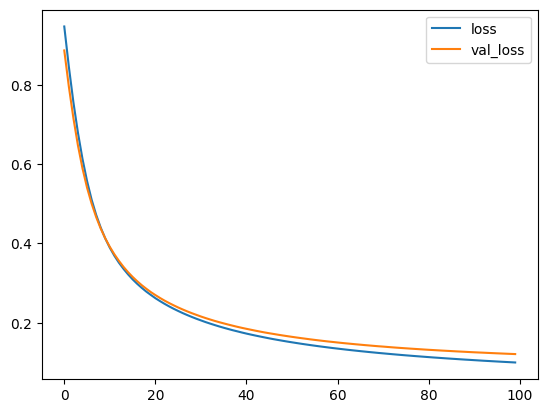

In [24]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend();

In [27]:
import numpy as np

In [28]:
#thse are model predictions given as probailityes between 0 and 1
# but we need to round them off to get the actual predictions and flatten them as targets are a 1Dim array but this is a 2Dim array
# hence round and flatten them
p = model.predict(X_test)
p = np.round(p).flatten()
print(p)

6/6 [==============================] - 0s 5ms/step
[1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.]


In [35]:
print("manually calculated accuracy:",np.mean(p==Y_test))
# equal equal mtlb linear classificiation so a boolean array of true and false
# aur fir 10001 aisi array ka mean toh accuracy aa gyi naa

manually calculated accuracy: 0.9574468085106383


In [36]:
print("model calculated accuracy:",model.evaluate(X_test,Y_test))


6/6 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9574
model calculated accuracy: [0.12120945006608963, 0.957446813583374]


In [37]:
model.metrics_names
# its possible that accross layers humare paas alag alag loss ho, dense_1_loss and so on acc to layers
# but los is the cumulative of all lossess

['loss', 'accuracy']

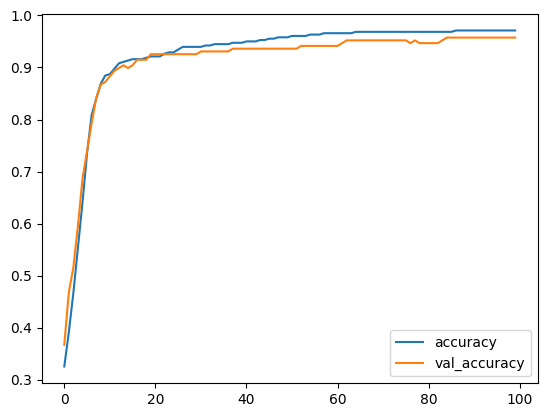

In [38]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend();

In [39]:
model.save('linearClassifierSavedModel.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [40]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  20K Jan 18 07:11 linearClassifierSavedModel.h5
drwxr-xr-x 1 root root 4.0K Jan 16 14:23 sample_data


In [41]:
!ls

linearClassifierSavedModel.h5  sample_data


In [42]:
# if we define a Input layer explicitly then loading saved  model throws an error
# but if we dont define it alag se but with dense it therows no error as such
model = tf.keras.models.load_model('linearClassifierSavedModel.h5')
print(model.layers)

In [43]:
model.evaluate(X_test,Y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.1212 - accuracy: 0.9574


[0.12120945006608963, 0.957446813583374]

In [44]:
from google.colab import files
files.download('/content/linearClassifierSavedModel.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>